<center><h1>Capstone Project Creation</h1></center>
<center><h3>IBM SkillsBuild Europe Delivery - Data Analytics</h3></center>


# Pre-requisite

* Understanding of Python, Power BI or Tableau
* Understanding of Data Cleaning
* Understanding Data Visualization

#### Level of Exercise: Intermediate

#### Duration: approximately 3 hours


### Data Analytics of Airbnb Data:

#### Objective:

In this exericise, you will be performing Data Analytics on an Open Dataset dataset coming from Airbnb. Some of the tasks include
- Data Cleaning.
- Data Transformation
- Data Visualization.

#### Overview of Airbnb Data:

People's main criteria when visiting new places are reasonable accommodation and food. Airbnb (Air-Bed-Breakfast) is an online marketplace created to meet this need of people by renting out their homes for a short term. They offer this facility at a relatively lower price than hotels. Further people worldwide prefer the homely and economical service offered by them. They offer services across various geographical locations

#### Dataset Source

YOu can get the dataset for this assessment using the following link: https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata

This dataset contains information such as the neighborhood offering these services, room type, price,avaliabilty, reviews, service fee, cancellation policy and rules to use the house. This analysis will help airbnb in improving its services.  

So all the best for your Data Analytics Journey on Airbnb data!!!

## Task 1: Data Loading (Python)

1. Read the csv file and load it into a pandas dataframe.
2. Display the first five rows of your dataframe.
3. Display the data types of the columns.

In [594]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [595]:
## Read the csv file
df= pd.read_csv('Data\Airbnb_Open_Data.csv')

C:\Users\Elena\AppData\Local\Temp\ipykernel_17532\4166700643.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('Data\Airbnb_Open_Data.csv')


In [596]:
## Display the first 5 rows
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [597]:
## Display the data types
print(df.dtypes)

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

## Task 2a: Data Cleaning (Any Tool)

1. Drop some of the unwanted columns. These include `host id`, `id`, `country` and `country code` from the dataset.
2. State the reason for not including these columns for your Data Analytics.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots before and after the elimination of the columns.

### Solution

**Excluded columns: Country, Country code, Name, license, host name, host id, id, house_rules, last review**
1. **Country.** There is only one category ("United States "), + 532 NaN values. So, the column doesn't add extra information
2. **Country code.** The same as Contry: only one category ("US"), and 131 NaN values. So, the column doesn't add extra information

In [598]:
print('Unique values in the column: \n', df['country'].value_counts(),'\n')

print('Unique values in the column: \n', df['country code'].value_counts())

Unique values in the column: 
 country
United States    102067
Name: count, dtype: int64 

Unique values in the column: 
 country code
US    102468
Name: count, dtype: int64


3. **Name** A name of a property shouldn't affect measurable parameters
4. **license** The column is almost empty, it has only 2 rows with non-NaN values

In [599]:
print('Count of unique values in the column:', df['license'].value_counts(),'\n')
print('Number of NaN values: \n', df['license'].isna().sum())

Count of unique values in the column: license
41662/AL    2
Name: count, dtype: int64 

Number of NaN values: 
 102597


5. **host name** A host is uniquely identified by ID, so the name column is redundant
6. **host id, id** look like good candidates for a key value, and I'd prefer to keep it. But they are not used in the analysis below and are asked to be removed
7. **house_rules** text field without categorical or numerical data
8. **last review**. It's unlikely that the date of the last review affects demand on the property, or any other parameter 

In [600]:
df = df.drop(columns=['country', 'country code','NAME', 'host id', 'id', 'host name', 'house_rules','last review', 'license'])

**Dataframe after the columns are removed**

In [601]:
df.head()

,host_identity_verified,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
0,unconfirmed,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020.0,$966,$193,10.0,9.0,0.21,4.0,6.0,286.0
1,verified,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,0.38,4.0,2.0,228.0
2,NaN,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,5.0,1.0,352.0
3,unconfirmed,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,4.64,4.0,1.0,322.0
4,verified,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,0.10,3.0,1.0,289.0


## Task 2b: Data Cleaning (Python)

- Check for missing values in the dataframe and display the count in ascending order. **If the values are missing, impute the values as per the datatype of the columns.**
- Check whether there are any duplicate values in the dataframe and, if present, remove them.
- Display the total number of records in the dataframe before and after removing the duplicates.

### Solution

**Missing values, part 1**

In [602]:
## Check for missing values in the dataframe and display the count in ascending order.
df_nullcount = df.isnull().sum()
print(df_nullcount.sort_values())

room type                             0
lat                                   8
long                                  8
neighbourhood                        16
neighbourhood group                  29
cancellation_policy                  76
instant_bookable                    105
number of reviews                   183
Construction year                   214
price                               247
service fee                         273
host_identity_verified              289
calculated host listings count      319
review rate number                  326
minimum nights                      409
availability 365                    448
reviews per month                 15879
dtype: int64


I fill in the missing values after removing duplicates and converting data types. By doing this, I ensure that the duplicated values do not distort mode and median values, and that a suitable algorithm for filling-in is chosen.

**Duplicates**

In [603]:
## Check whether there are any duplicate values in the dataframe and if present remove them.
print('The total number of records in the dataframe before removing the duplicates: %.0f' %len(df))
print('There are %.0f duplicated values in the dataframe' %df.duplicated().sum())

# remove duplicated rows

df.drop(df[df.duplicated()].index, inplace=True)

The total number of records in the dataframe before removing the duplicates: 102599
There are 3636 duplicated values in the dataframe


In [604]:
# check if the duplicates were removed
print('There are %.0f duplicated values in the dataframe' %df.duplicated().sum())

There are 0 duplicated values in the dataframe


In [605]:
## Display the total number of records in the dataframe after removing the duplicates.
print('The total number of records in the dataframe after removing the duplicates:')
len(df)

The total number of records in the dataframe after removing the duplicates:


98963

## Task 3: Data Transformation (Any Tool)


- Rename the column `availability 365` to `days_booked`
- Convert all column names to lowercase and replace the spaces in the column names with an underscore "_".
- Remove the dollar sign and comma from the columns `price` and `service_fee`. If necessary, convert these two columns to the appropriate data type.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

### Solution

**Renaming columns**

In [606]:
## Rename the `availability 365` column.
df=df.rename(columns={"availability 365": "days_booked"})

In [607]:
## Convert all column names to lowercase and replace the spaces with an underscore "_"
columns_titles = []
for title in df.columns:
    title=title.replace(' ','_')
    columns_titles.append(title.lower())
    
df.columns=columns_titles

In [608]:
#checking the names of columns after the transformation
df.head()

,host_identity_verified,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,days_booked
0,unconfirmed,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020.0,$966,$193,10.0,9.0,0.21,4.0,6.0,286.0
1,verified,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,0.38,4.0,2.0,228.0
2,NaN,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,5.0,1.0,352.0
3,unconfirmed,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,4.64,4.0,1.0,322.0
4,verified,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,0.10,3.0,1.0,289.0


**Converting price data to the float data type**

In [609]:
## Remove the dollar sign and comma from the columns. If necessary, convert these two columns to the appropriate data type.

In [610]:
def replace_symbols(x):
    if x is not np.NaN:
        x=x.replace(',','').replace(' ','').replace('$','') 
    return(x)

In [611]:
df.price=df.price.apply(replace_symbols)
df.price=df.price.astype(float)

df.service_fee=df.service_fee.apply(replace_symbols)
df.service_fee=df.service_fee.astype(float)


**Fixing misspellings in the names of neighborhood groups**

In [612]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'brookln', 'manhatan', 'Queens', nan,
       'Staten Island', 'Bronx'], dtype=object)

In [613]:
df.neighbourhood_group=df.neighbourhood_group.replace('brookln','Brooklyn').replace('manhatan','Manhattan')

In [614]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', nan, 'Staten Island', 'Bronx'],
      dtype=object)

In [615]:
df.head()

,host_identity_verified,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,days_booked
0,unconfirmed,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020.0,966.0,193.0,10.0,9.0,0.21,4.0,6.0,286.0
1,verified,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,0.38,4.0,2.0,228.0
2,NaN,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,2005.0,620.0,124.0,3.0,0.0,NaN,5.0,1.0,352.0
3,unconfirmed,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,2005.0,368.0,74.0,30.0,270.0,4.64,4.0,1.0,322.0
4,verified,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009.0,204.0,41.0,10.0,9.0,0.10,3.0,1.0,289.0


**Droping rows with negative values in the minimum_nights column**

In [616]:
df=df[df['minimum_nights']>=0]

**Setting data types**

In [617]:
# categorical_columns=['host_identity_verified', 'neighbourhood_group', 'neighbourhood','cancellation_policy', 'room_type','construction_year']

boolean_columns=['instant_bookable']

# for column in categorical_columns:
#     df[column]=df[column].astype('category')
    
for column in boolean_columns:
    df[column]=df[column].astype('bool')

In [618]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98552 entries, 0 to 102057
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_identity_verified          98273 non-null  object 
 1   neighbourhood_group             98524 non-null  object 
 2   neighbourhood                   98537 non-null  object 
 3   lat                             98544 non-null  float64
 4   long                            98544 non-null  float64
 5   instant_bookable                98552 non-null  bool   
 6   cancellation_policy             98477 non-null  object 
 7   room_type                       98552 non-null  object 
 8   construction_year               98350 non-null  float64
 9   price                           98305 non-null  float64
 10  service_fee                     98279 non-null  float64
 11  minimum_nights                  98552 non-null  float64
 12  number_of_reviews               9837

**Missing values, part 2**

Replacing NaN values

In [619]:
#number of NaN values in the data frame

df_nullcount = df.isnull().sum()
print(df_nullcount.sort_values())

instant_bookable                      0
room_type                             0
minimum_nights                        0
lat                                   8
long                                  8
neighbourhood                        15
neighbourhood_group                  28
cancellation_policy                  75
number_of_reviews                   178
construction_year                   202
price                               247
service_fee                         273
host_identity_verified              279
review_rate_number                  293
calculated_host_listings_count      308
days_booked                         426
reviews_per_month                 15282
dtype: int64


After the duplicates are removed, and the data types and values are corrected, I replace the missing values (with mod value for categorical data and median value for numerical):

In [620]:
mode=''
median=0
for column in df:
    if df[column].dtypes == 'O':
        mode=df[column].mode()
        df[column].fillna(mode[0], inplace=True)
        
    if df[column].dtypes == 'float64':
        median=df[column].median()
        df[column].fillna(median, inplace=True)

In [621]:
#checking that there are no missing values left

df_nullcount = df.isnull().sum()
print(df_nullcount.sort_values())

host_identity_verified            0
review_rate_number                0
reviews_per_month                 0
number_of_reviews                 0
minimum_nights                    0
service_fee                       0
price                             0
calculated_host_listings_count    0
construction_year                 0
cancellation_policy               0
instant_bookable                  0
long                              0
lat                               0
neighbourhood                     0
neighbourhood_group               0
room_type                         0
days_booked                       0
dtype: int64


In [622]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98552 entries, 0 to 102057
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_identity_verified          98552 non-null  object 
 1   neighbourhood_group             98552 non-null  object 
 2   neighbourhood                   98552 non-null  object 
 3   lat                             98552 non-null  float64
 4   long                            98552 non-null  float64
 5   instant_bookable                98552 non-null  bool   
 6   cancellation_policy             98552 non-null  object 
 7   room_type                       98552 non-null  object 
 8   construction_year               98552 non-null  float64
 9   price                           98552 non-null  float64
 10  service_fee                     98552 non-null  float64
 11  minimum_nights                  98552 non-null  float64
 12  number_of_reviews               9855

### Task 4: Exploratory Data Analysis (Any Tool)

- List the count of various room types avaliable in the dataset.
- Which room type has the most strict cancellation policy?
- List the average price per neighborhood group, and highlight the most expensive neighborhood to rent from.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

**Room types**

In [623]:
## List the count of various room types avaliable with Airbnb
print("The number of rooms by room types")
print(df.room_type.value_counts())

The number of rooms by room types
room_type
Entire home/apt    51681
Private room       44618
Shared room         2140
Hotel room           113
Name: count, dtype: int64


**Strict cancellation policy**

In [624]:
## Which room type adheres to more strict cancellation policy

#Checking fraction of rooms with different cancellation policy by room type

for x in df.room_type.unique():
    print(x)
    print(df[df.room_type == x].cancellation_policy.value_counts(normalize=True, sort=False), '\n')
#     print(x, df[df.room_type == x], '\n')

Private room
cancellation_policy
strict      0.332467
flexible    0.330360
moderate    0.337173
Name: proportion, dtype: float64 

Entire home/apt
cancellation_policy
moderate    0.334340
flexible    0.333972
strict      0.331689
Name: proportion, dtype: float64 

Shared room
cancellation_policy
moderate    0.333178
flexible    0.332243
strict      0.334579
Name: proportion, dtype: float64 

Hotel room
cancellation_policy
flexible    0.371681
moderate    0.327434
strict      0.300885
Name: proportion, dtype: float64 



In [625]:
## Which room type adheres to more strict cancellation policy
print("Fraction of rooms with strict cancellation policy by room type:")
canc_polisy={}
for x in df.room_type.unique():
    canc_polisy[x]=df[df.room_type == x].cancellation_policy.value_counts(normalize=True, sort=False)['strict']
#     print(df[df.room_type == x].shape[0])
    print(x, '      \t', "%.4f" % canc_polisy[x])

Fraction of rooms with strict cancellation policy by room type:
Private room       	 0.3325
Entire home/apt       	 0.3317
Shared room       	 0.3346
Hotel room       	 0.3009


The fraction of rooms with strict cancelation policy is slightly higher for shared rooms (33.4%) than for private rooms, but the difference is small, so I'd like to check if it is statistically significant. In order to do so, I compare it with the standard deviation for the sample: 

In [626]:
canc_polisy={}
for x in df.room_type.unique():
    canc_polisy[x]=df[df.room_type == x].cancellation_policy.value_counts(normalize=True, sort=False)['strict']
#     print(df[df.room_type == x].shape[0])
    p=canc_polisy[x]
    q=(1-p)
    N=df[df.room_type == x].shape[0]
    std = np.sqrt(p*q)/np.sqrt(N-1)
    p_percent=p*100
    std_percent=std*100
    print(x, '      \t', "%.2f" % p_percent, '% \t with standard deviation \t' , "%.2f" % std_percent, '%' )

Private room       	 33.25 % 	 with standard deviation 	 0.22 %
Entire home/apt       	 33.17 % 	 with standard deviation 	 0.21 %
Shared room       	 33.46 % 	 with standard deviation 	 1.02 %
Hotel room       	 30.09 % 	 with standard deviation 	 4.33 %


Thus, the variations are within the standard deviation, which makes me conclude that there is no statistically significant difference in the fractions of the rooms with strict cancellation rules for different room types.

In [647]:
df[df.cancellation_policy == 'strict'].room_type.value_counts()

room_type
Entire home/apt    17142
Private room       14834
Shared room          716
Hotel room            34
Name: count, dtype: int64

The total number of rooms with a strict canelation policy is higher in the "Entire home/apt" group.

**The prices by neighborhood group**

In [627]:
## List the prices by neighborhood group and also mention which is the most expensive neighborhood group for rentals

print("Average price by neighborhood group:")

df['price'].groupby(df['neighbourhood_group']).mean().sort_values(ascending=False)

# df.sort_values('neighbourhood_group')[['neighbourhood_group',"price"]]
# for x in df.neighbourhood_group.unique():
#     print(x, "  \t $ %.1f" %df[df.neighbourhood_group == x].price.mean(), "\t $ %.1f" %df[df.neighbourhood_group == x].price.std())

Average price by neighborhood group:


neighbourhood_group
Queens           629.437353
Bronx            627.094615
Staten Island    627.065862
Brooklyn         626.471400
Manhattan        622.749039
Name: price, dtype: float64

We can see, that Queens is on average a bit more expencive neighbourhood group to rent from

In [628]:
df['price'].groupby(df['neighbourhood']).mean().sort_values(ascending=False)[0:1]

neighbourhood
New Dorp    1045.333333
Name: price, dtype: float64

The most expenciveneighbourhood to rent from is New Dorp

## Task 5a: Data Visualization (Any Tool)

* List the count of various room types avaliable with Airnb
* Which room type adheres to more strict cancellation policy
* List the prices by neighborhood group and also mention which is the most expensive neighborhood group for rentals
* List the top 10 neighborhoods in the increasing order of their price with the help of a horizontal bar graph. Which is the cheapest neighborhood.
* List the neighborhoods which offer short term rentals within 10 days. Illustrate with a bar graph
* List the prices with respect to room type using a bar graph and also state your inferences.
* Create a pie chart that shows  distribution of booked days for each neighborhood group .Which neighborhood has the highest booking percentage.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [629]:
# List the count of various room types avaliable with Airnb
# Which room type adheres to more strict cancellation policy
# List the prices by neighborhood group and also mention which is the most expensive neighborhood group for rentals

# See Task 4 

**The top 10 cheapest neighborhoods**

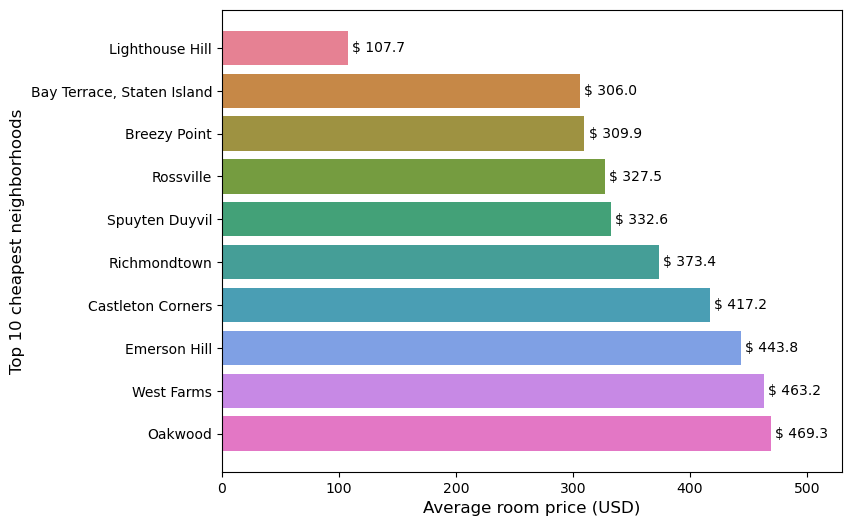

In [630]:
## List the top 10 neighborhoods in the increasing order of their price with the help of a horizontal bar graph. Which is the cheapest neighborhood.
top_10_neighbourhood=df['price'].groupby(df['neighbourhood']).mean().sort_values()[0:10]


fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=df['price'].groupby(df['neighbourhood']).mean().sort_values()[0:10].values,
            y=df['price'].groupby(df['neighbourhood']).mean().sort_values()[0:10].index,
            palette = 'husl', ax=ax)

ax.bar_label(ax.containers[0], fmt='$ %.1f', padding=3)

# pad the spacing between the number and the edge of the figure
ax.margins(y=0.05, x=0.05)
ax.set_xlim(0, 530)
ax.set_xlabel( "Average room price (USD)" , size = 12 )
ax.set_ylabel( "Top 10 cheapest neighborhoods" , size = 12 )


plt.show()

The cheapest neighborhood is Lighthouse Hill

**The neighborhoods which offer short term rentals**

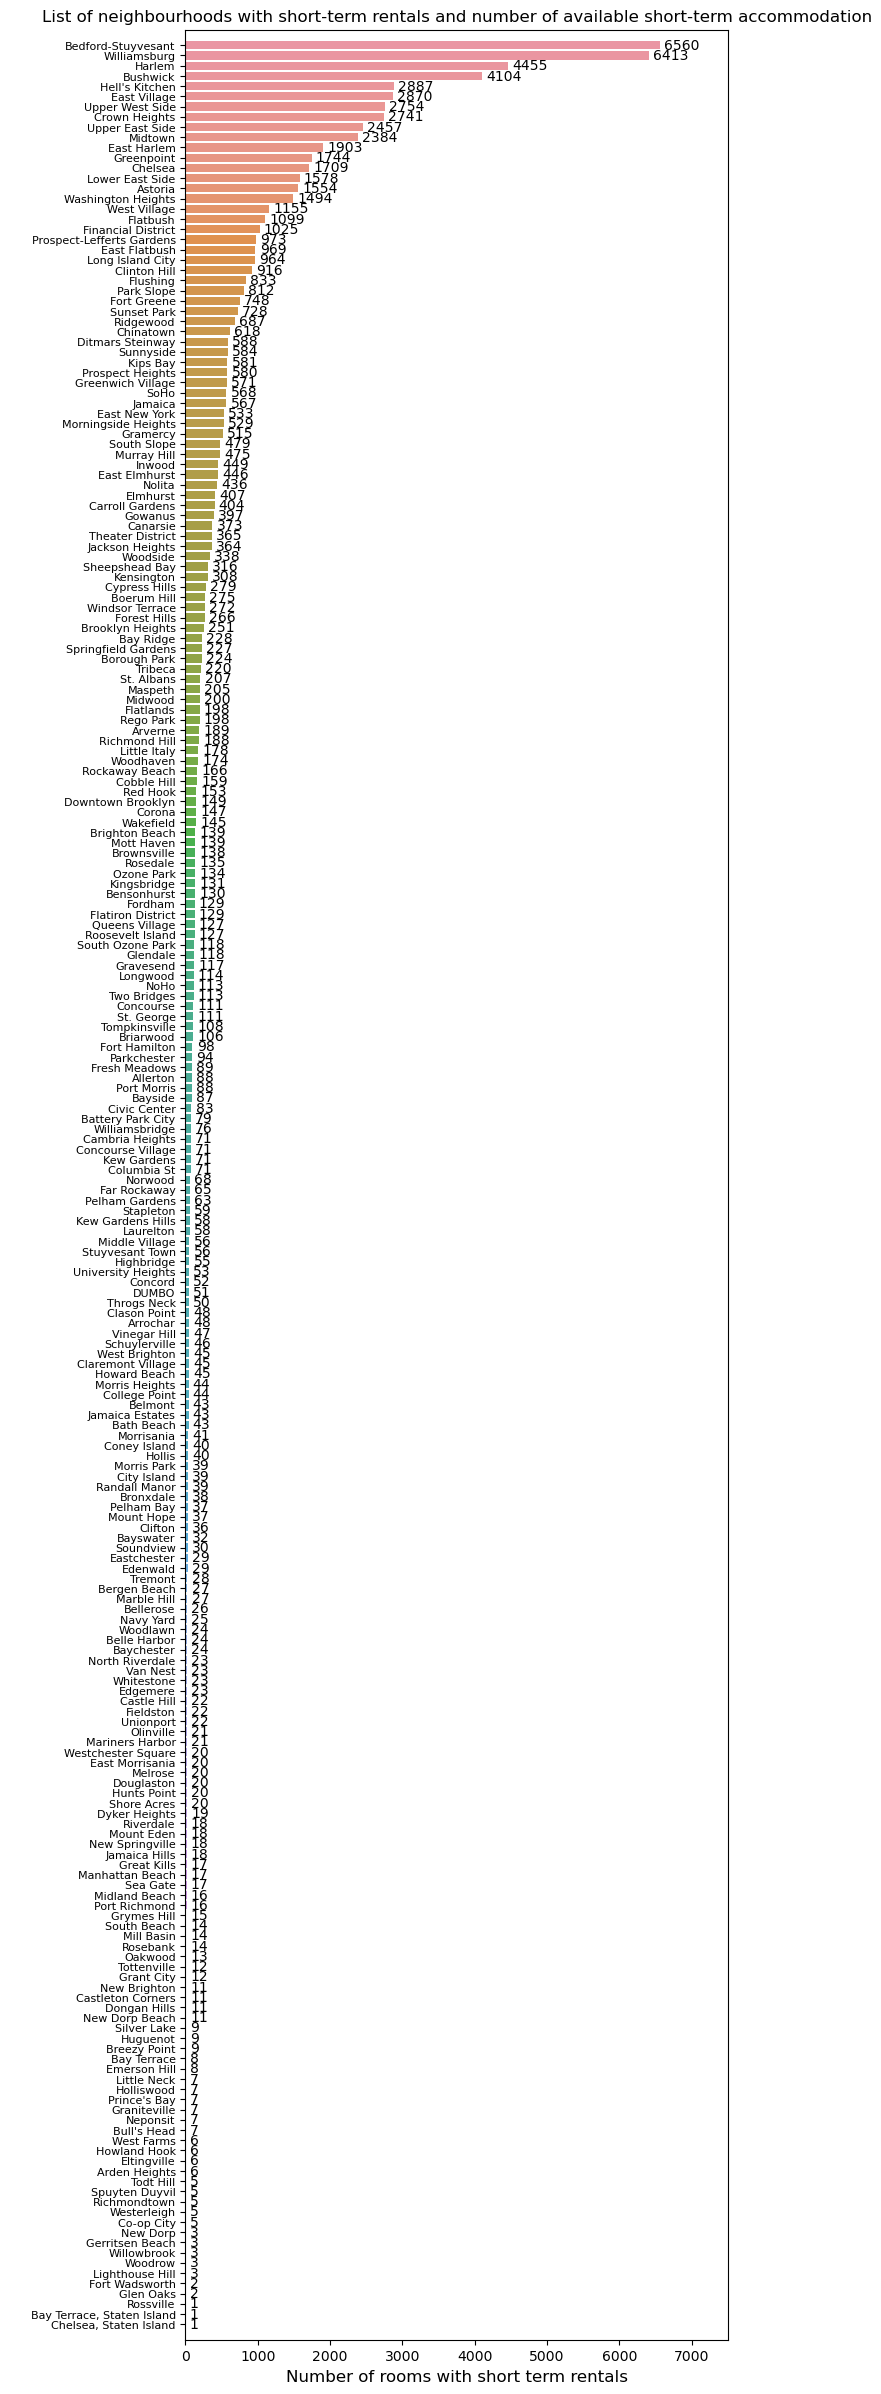

In [631]:
#List the neighborhoods which offer short term rentals within 10 days. Illustrate with a bar graph

df_short_stay=df[df['minimum_nights']<=10]
df_short_stay['neighbourhood'].value_counts().sort_values(ascending=False)


fig, ax = plt.subplots(figsize=(7, 30))
ax=sns.barplot(y=df_short_stay['neighbourhood'].value_counts().sort_values(ascending=False).index,
            x=df_short_stay['neighbourhood'].value_counts().sort_values(ascending=False).values)
# df_short_stay.groupby(df_short_stay['minimum_nights'])
plt.yticks(size=8)
plt.yticks(size=8)

ax.set_xlabel( "Number of rooms with short term rentals" , size = 12 )
ax.set_ylabel( " " , size = 12 )
ax.bar_label(ax.containers[0], fmt='%.0f', padding=3)

ax.set_xlim(0, 7500)
ax.margins(y=0.005)
ax.set_title('List of neighbourhoods with short-term rentals and number of available short-term accommodation')
plt.show()

**The price by room type**

In [632]:
# List the prices with respect to room type using a bar graph and also state your inferences.
df_pices_by_room_type=df.price.groupby(df['room_type']).mean().sort_values(ascending=False)

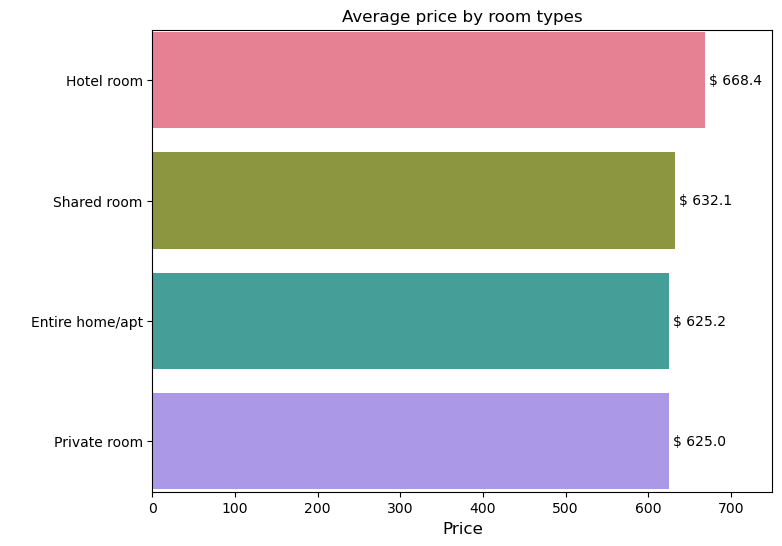

In [633]:
fig, ax = plt.subplots(figsize=(8, 6))
ax=sns.barplot(y=df_pices_by_room_type.index,
            x=df_pices_by_room_type.values, palette = 'husl')

ax.set_xlabel( "Price" , size = 12 )
ax.set_ylabel( " " , size = 12 )
ax.bar_label(ax.containers[0], fmt='$ %.1f', padding=3)

ax.set_xlim(0, 750)
ax.margins(y=0.005)
ax.set_title('Average price by room types')
plt.show()

The most expensive accommodation option on average is a hotel room. A private room is the cheapest option.


**The booking percentage by neighborhood group**

In [634]:
# Create a pie chart that shows  distribution of booked days for each neighborhood group. Which neighborhood has the highest booking percentage.

df_booking_percentage=df.days_booked.groupby(df['neighbourhood_group']).mean().sort_values(ascending=False)
df_booking_percentage=df_booking_percentage.apply(lambda x: x/365*100)

In [635]:
df_booking_percentage

neighbourhood_group
Staten Island    53.716374
Bronx            49.037724
Queens           44.502418
Manhattan        39.033253
Brooklyn         35.821183
Name: days_booked, dtype: float64

Staten Island has the highest booking percentage of 54%

In [636]:
df_booking_total=df.days_booked.groupby(df['neighbourhood_group']).sum().sort_values(ascending=False)

In [637]:
df_booking_total

neighbourhood_group
Manhattan        6002319.0
Brooklyn         5250420.0
Queens           2071681.0
Bronx             465368.0
Staten Island     178615.0
Name: days_booked, dtype: float64

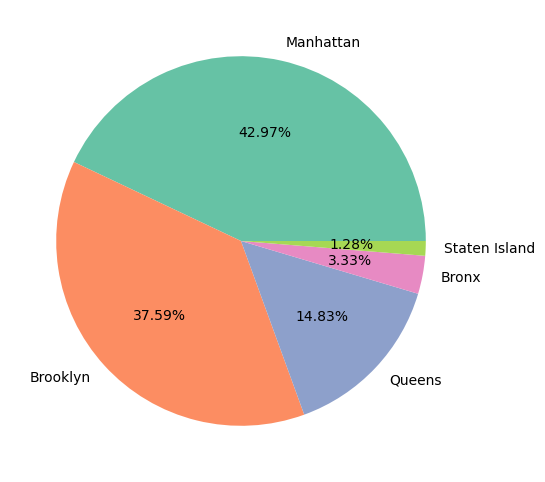

In [638]:
fig, ax = plt.subplots(figsize=(8, 6))


ax=plt.pie(df_booking_total.values, labels=df_booking_total.index, autopct='%1.2f%%', colors=sns.color_palette('Set2')) # Create pie chart

# ax.set_xlabel( "Price" , size = 12 )
# ax.set_ylabel( " " , size = 12 )
# ax.bar_label(ax.containers[0], fmt='$ %.1f', padding=3)

# ax.set_xlim(0, 750)
# ax.margins(y=0.005)
# ax.set_title('Average price by room types')
plt.show()

The total amount of booked days is the biggest for Manhattan

## Task 5b: Data Visualization (Any Tool)

* Does service price and room price have an impact on each other. Illustrate this relationship with a scatter plot and state your inferences
* Using a line graph show in which year the maximum construction of rooms took place.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

**Relation between service price and room price**

Text(0, 0.5, 'Service fee, USD')

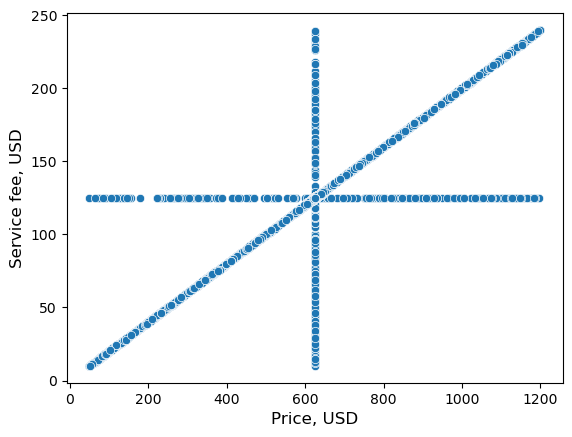

In [639]:
ax=sns.scatterplot(data=df, y='service_fee',x='price')
ax.set_xlabel( "Price, USD" , size = 12 )
ax.set_ylabel( "Service fee, USD" , size = 12 )
# ax.set_xlim(624, 626)

There are three clusters of data.
The diagonal line shows that the  service fee has a strong positive correlation with the room price.
The vertical and horizontal lines correspond to the mean values that we used to replace NaN values in the data frame. 

**Construction of rooms by years**

In [640]:
# Using a line graph show in which year the maximum construction of rooms took place

df_rooms_by_year=df.value_counts(df['construction_year'])


C:\Users\Elena\Anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Elena\Anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


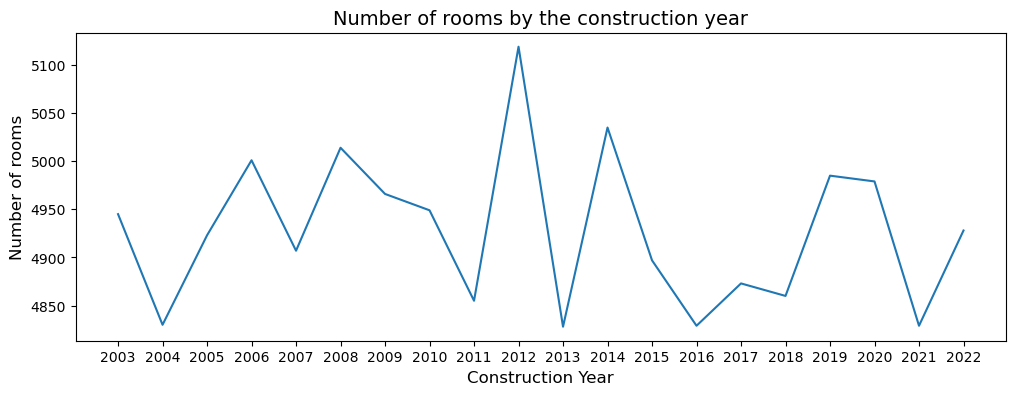

In [641]:
fig, ax = plt.subplots(figsize=(12, 4))
ax=sns.lineplot( x=df_rooms_by_year.index, y=df_rooms_by_year.values)

ax.set_xlabel( "Construction Year" , size = 12 )
ax.set_ylabel( "Number of rooms" , size = 12 )

ax.set_xticks(range(2003,2023))

ax.set_title('Number of rooms by the construction year', size = 14)
plt.show()

The maximum construction of room took place in 2012.

## Task 5c: Data Visualization (Any Tool)

* With the help of box plots illustrate the following
 * Effect of Review Rate number on price
 * Effect of host identity verified on price

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

**Effect of Review Rate number on price**

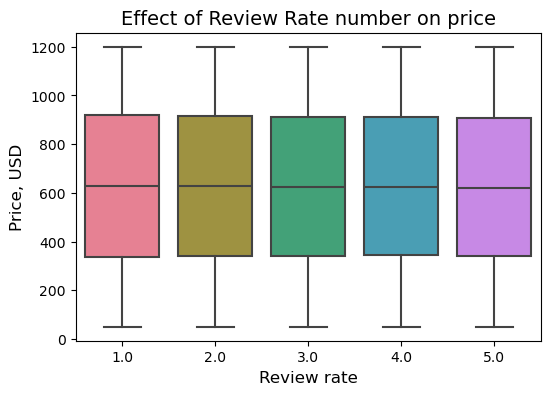

In [642]:
# With the help of box plots illustrate the following
# Effect of Review Rate number on price



fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(data=df, y='price', x='review_rate_number', palette = 'husl')

ax.set_xlabel( "Review rate" , size = 12 )
ax.set_ylabel( "Price, USD" , size = 12 )

ax.set_xticks(range(0,5))

ax.set_title('Effect of Review Rate number on price', size = 14)
plt.show()


The review rate doesn't have a noticeable effect on the price

**Effect of host identity verified on price**

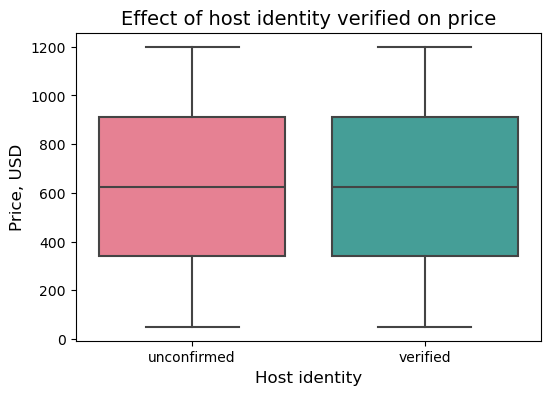

In [643]:
# With the help of box plots illustrate the following
# Effect of host identity verified on price

fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(data=df, y='price', x='host_identity_verified', palette = 'husl')

ax.set_xlabel( "Host identity" , size = 12 )
ax.set_ylabel( "Price, USD" , size = 12 )

ax.set_title('Effect of host identity verified on price', size = 14)
plt.show()